### introduction : 
**Linear regression** is a statistical technique, used to model the relationship between  
a dependent variable, and one or more independent variables.  
It assumes a linear relationship between the variables, where the dependent      
variable can be predicted as a linear combination of the independent variables.  

In [16]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df = pd.read_csv("numeric_df.csv")
df

,Flight_duration,Flights_per_day,distance (km),Operating airlines,Price,is_Boeing,is_Airbus
0,80,14,393,6,122,0,1
1,75,13,230,5,99,1,1
2,100,12,465,1,102,0,1
3,130,13,770,5,124,1,1
4,65,10,208,4,134,0,1
...,...,...,...,...,...,...,...
3860,110,1,691,1,276,1,1
3861,120,1,755,1,273,1,1
3862,160,1,878,2,153,1,0
3863,155,1,839,1,409,1,1


## EDA & Data Analysis

In [18]:
### EDA helps us understand the dataset and its features. We can start by examining the statistical summary and data types
### made sure there are no NULL values in the dataFrame
print(df.describe())
print("\n ------------------------------------------------------ \n")
print(df.info())

       Flight_duration  Flights_per_day  distance (km)  Operating airlines  \
count      3865.000000      3865.000000    3865.000000         3865.000000   
mean        212.157568         2.661320    1442.029754            2.045019   
std         169.460326         2.666003    1432.359700            1.305959   
min          30.000000         0.000000      62.000000            1.000000   
25%         105.000000         1.000000     533.000000            1.000000   
50%         150.000000         2.000000     912.000000            2.000000   
75%         240.000000         3.000000    1659.000000            3.000000   
max         865.000000        27.000000    7249.000000           12.000000   

             Price    is_Boeing    is_Airbus  
count  3865.000000  3865.000000  3865.000000  
mean    256.800000     0.528590     0.843726  
std     216.259893     0.499247     0.363162  
min      43.000000     0.000000     0.000000  
25%     130.000000     0.000000     1.000000  
50%     171.000

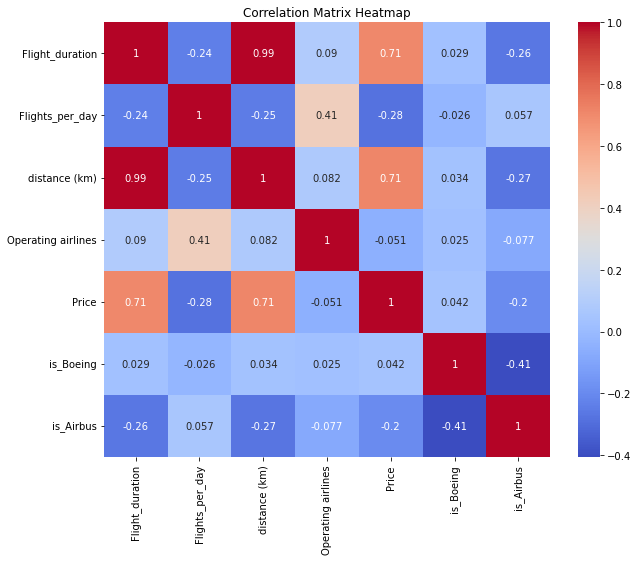

In [19]:
### Create correlation matrix, with visualization (using heatmap)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

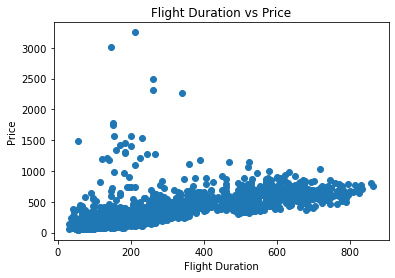

In [20]:
### based on the heatmap, lets look into the relations between 'Flight_duration', 'Price' and 'distance (km)'
### Scatter plot of 'Flight_duration' vs 'Price'
plt.scatter(df['Flight_duration'], df['Price'])
plt.xlabel('Flight Duration')
plt.ylabel('Price')
plt.title('Flight Duration vs Price')
plt.show()

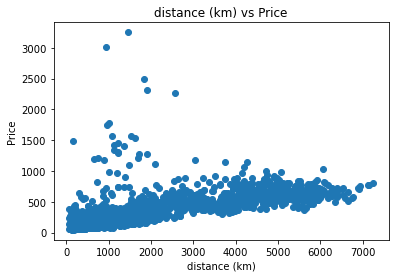

In [21]:
### Scatter plot of 'distance (km)' vs 'Price'
plt.scatter(df['distance (km)'], df['Price'])
plt.xlabel('distance (km)')
plt.ylabel('Price')
plt.title('distance (km) vs Price')
plt.show()

**Based on the scatter plots, we can clearly observe outliers that might affect the quality of the model. We will address this issue by handling outliers in the subsequent steps.**
  

## Machine Learning

#### Let's build some different linear regression models, and then compare between them (base on their R^2 scores)

In [22]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model 1 - R^2 Score: 0.4940385334273093


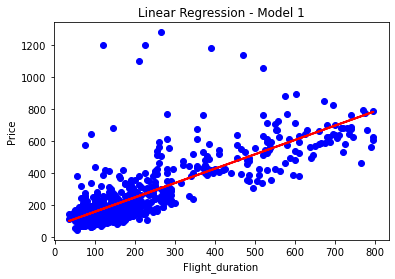

In [23]:
# Model 1: Using 'Flight_duration'
X_train_flight_duration = X_train[['Flight_duration']]
X_test_flight_duration = X_test[['Flight_duration']]

model_1 = LinearRegression()
model_1.fit(X_train_flight_duration, y_train)
y_pred_1 = model_1.predict(X_test_flight_duration)
scores_1 = cross_val_score(model_1, X_train_flight_duration, y_train, cv=5)
average_r2_1 = scores_1.mean()

# Print the R^2 score for Model 1
print("Model 1 - R^2 Score:", average_r2_1)

# Plot the linear line representing Model 1
plt.scatter(X_test_flight_duration['Flight_duration'], y_test, color='blue')
plt.plot(X_test_flight_duration['Flight_duration'], y_pred_1, color='red', linewidth=2)
plt.xlabel('Flight_duration')
plt.ylabel('Price')
plt.title('Linear Regression - Model 1')
plt.show()

Model 2 - Average R^2 Score: 0.5032397644023818


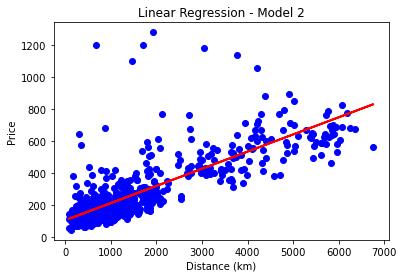

In [24]:
# Model 2: Using 'distance (km)'
X_train_distance = X_train[['distance (km)']]
X_test_distance = X_test[['distance (km)']]

model_2 = LinearRegression()
model_2.fit(X_train_distance, y_train)
y_pred_2 = model_2.predict(X_test_distance)
scores_2 = cross_val_score(model_2, X_train_distance, y_train, cv=5)
average_r2_2 = scores_2.mean()

# Print the average R^2 score for Model 2
print("Model 2 - Average R^2 Score:", average_r2_2)

# Plot the linear line representing Model 2
plt.scatter(X_test_distance['distance (km)'], y_test, color='blue')
plt.plot(X_test_distance['distance (km)'], y_pred_2, color='red', linewidth=2)
plt.xlabel('Distance (km)')
plt.ylabel('Price')
plt.title('Linear Regression - Model 2')
plt.show()

**Now, let's try 'Multiple Linear Regression' models**

Model 3 - Average R^2 Score: 0.5185820901014571


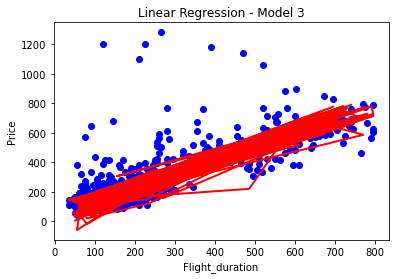

In [25]:
# Model 3: Using all features

model_3 = LinearRegression()
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
scores_3 = cross_val_score(model_3, X_train, y_train, cv=5)
average_r2_3=scores_3.mean()

# Print the average R^2 score for Model 3
print("Model 3 - Average R^2 Score:", scores_3.mean())

# Plot the linear line representing Model 3
plt.scatter(X_test['Flight_duration'], y_test, color='blue')
plt.plot(X_test['Flight_duration'], y_pred_3, color='red', linewidth=2)
plt.xlabel('Flight_duration')
plt.ylabel('Price')
plt.title('Linear Regression - Model 3')
plt.show()

Model 4 - Average R^2 Score: 0.5037473727479937


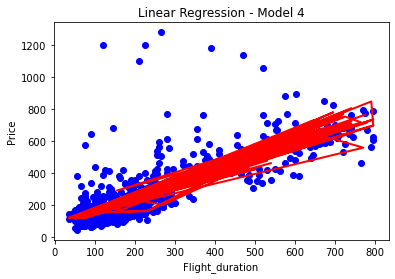

In [26]:
# Model 4: Using only 'Flight_duration' and 'distance (km)'
model_4 = LinearRegression()
model_4.fit(X_train[['Flight_duration', 'distance (km)']], y_train)
y_pred_4 = model_4.predict(X_test[['Flight_duration', 'distance (km)']])
scores_4 = cross_val_score(model_4, X_train[['Flight_duration', 'distance (km)']], y_train, cv=5)
average_r2_4=scores_4.mean()

# Print the average R^2 score for Model 4
print("Model 4 - Average R^2 Score:", average_r2_4)

# Plot the linear line representing Model 4
plt.scatter(X_test['Flight_duration'], y_test, color='blue')
plt.plot(X_test['Flight_duration'], y_pred_4, color='red', linewidth=2)
plt.xlabel('Flight_duration')
plt.ylabel('Price')
plt.title('Linear Regression - Model 4')
plt.show()


Model 5 - Average R^2 Score: 0.5088908242119009


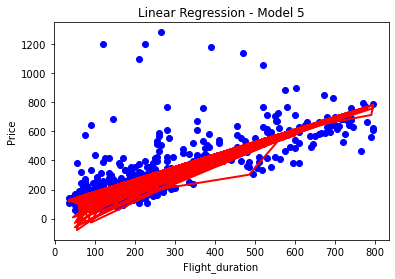

In [27]:
# Model 5: Using 'Flight_duration', 'Flights_per_day' and 'is_Boeing'

model_5 = LinearRegression()
model_5.fit(X_train[['Flight_duration','Flights_per_day', 'is_Boeing']], y_train)
y_pred_5 = model_5.predict(X_test[['Flight_duration','Flights_per_day', 'is_Boeing']])
scores_5 = cross_val_score(model_5, X_train[['Flight_duration','Flights_per_day', 'is_Boeing']], y_train, cv=5)
average_r2_5=scores_5.mean()

# Print the average R^2 score for Model 5
print("Model 5 - Average R^2 Score:", average_r2_5)

# Plot the linear line representing Model 5
plt.scatter(X_test['Flight_duration'], y_test, color='blue')
plt.plot(X_test['Flight_duration'], y_pred_5, color='red', linewidth=2)
plt.xlabel('Flight_duration')
plt.ylabel('Price')
plt.title('Linear Regression - Model 5')
plt.show()

**Example of very weak correlations between the features, reflacted in the scatter plot of  
'Actual vs Predicted' values.  
in an ideal scenario, the scatter plot would show a tight cluster of points along the diagonal line y=x.**


Model 6 - Average R^2 Score: 0.11584326610604875


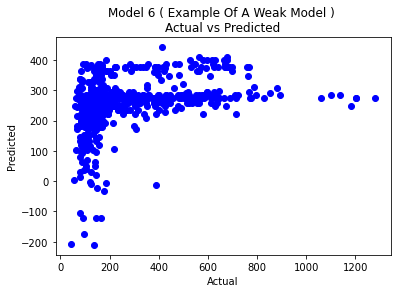

In [28]:
# Model 6: Using 'Flights_per_day', 'Operating airlines', and 'is_Airbus'

model_6 = LinearRegression()
model_6.fit(X_train[['Flights_per_day', 'Operating airlines', 'is_Airbus']], y_train)
y_pred_6 = model_6.predict(X_test[['Flights_per_day', 'Operating airlines', 'is_Airbus']])
scores_6 = cross_val_score(model_6, X_train[['Flights_per_day', 'Operating airlines', 'is_Airbus']], y_train, cv=5)
average_r2_6=scores_6.mean()

# Print the average R^2 score for Model 6
print("Model 6 - Average R^2 Score:", average_r2_6)

# Plot the scatter plot representing Model 6 (Actual vs Predicted)
plt.scatter( y_test,y_pred_6, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model 6 ( Example Of A Weak Model ) \nActual vs Predicted')
plt.show()

### Comparison of R^2 Scores for Different Models

Text(0.5, 1.0, 'Comparison of R^2 Scores for Different Models')

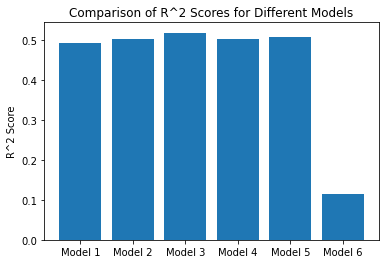

In [29]:
r2_scores = [average_r2_1 ,average_r2_2, average_r2_3, average_r2_4, average_r2_5, average_r2_6]

# Model names
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']

# Plot the bar chart
plt.bar(model_names, r2_scores)
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores for Different Models')

### Outliers Handling
**Based on the R^2 scores of the different models, it appears that similarly to the correlation matrix,  
a good model includes the features 'distance (km)' and 'flight_duration'. Other features seem to have little  
direct correlation with the flight price.**   
**Now, as promised , let's see if we can improve the models by handling outliers.**
<br>  
Note: The differences between the results of the models are tiny.
Therefore, we will choose to refer to the R^2 average (which will be obtained through the use of cross-validation) and not to the result obtained on the basis of a random sample.  
<br>
**Visualization Approach:**

In [30]:
### as seen in the 2 first scatter plots , we've found outliers data points that deviate significantly from the general pattern.
### It is easy to recognize that the flights whose prices are higher than 1000 are very different from the other points
### On this approach, of "outliers drop", we will simply delete the rows where 'Price' is higher than 1000.

df_outliers_dropped = df.copy()
df_outliers_dropped = df_outliers_dropped[df_outliers_dropped['Price'] <= 1000]
X = df_outliers_dropped.drop('Price', axis=1)
y = df_outliers_dropped['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Model 1: Using flight duration (outliers_dropped)
model1_dropped = LinearRegression()
model1_dropped.fit(X_train[['Flight_duration']], y_train)
y_pred1_dropped = model1_dropped.predict(X_test[['Flight_duration']])
scores_1_dropped = cross_val_score(model1_dropped, X_train[['Flight_duration']], y_train, cv=5)
average_r2_1_dropped=scores_1_dropped.mean()

# Model 2: Using distance (km) (outliers_dropped)
model2_dropped = LinearRegression()
model2_dropped.fit(X_train[['distance (km)']], y_train)
y_pred2_dropped = model2_dropped.predict(X_test[['distance (km)']])
scores_2_dropped = cross_val_score(model2_dropped, X_train[['distance (km)']], y_train, cv=5)
average_r2_2_dropped=scores_2_dropped.mean()

# Model 3: Using all features (outliers_dropped)
model3_dropped = LinearRegression()
model3_dropped.fit(X_train, y_train)
y_pred3_dropped = model3_dropped.predict(X_test)
scores_3_dropped = cross_val_score(model3_dropped, X_train, y_train, cv=5)
average_r2_3_dropped=scores_3_dropped.mean()

# Model 4: Using only Flight_duration and distance (km) (outliers_dropped)
model4_dropped = LinearRegression()
model4_dropped.fit(X_train[['Flight_duration', 'distance (km)']], y_train)
y_pred4_dropped = model4_dropped.predict(X_test[['Flight_duration', 'distance (km)']])
scores_4_dropped = cross_val_score(model4_dropped, X_train[['Flight_duration', 'distance (km)']], y_train, cv=5)
average_r2_4_dropped=scores_4_dropped.mean()

# Model 5: Using 'Flight_duration', 'Flights_per_day' and 'is_Boeing' (outliers_dropped)
model5_dropped = LinearRegression()
model5_dropped.fit(X_train[['Flight_duration','Flights_per_day', 'is_Boeing']], y_train)
y_pred5_dropped = model5_dropped.predict(X_test[['Flight_duration','Flights_per_day', 'is_Boeing']])
scores_5_dropped = cross_val_score(model5_dropped, X_train[['Flight_duration','Flights_per_day', 'is_Boeing']], y_train, cv=5)
average_r2_5_dropped=scores_5_dropped.mean()

# Model 6: Using Flights_per_day, Operating airlines, and is_Airbus (dropped)
model6_dropped = LinearRegression()
model6_dropped.fit(X_train[['Flights_per_day', 'Operating airlines', 'is_Airbus']], y_train)
y_pred6_dropped = model6_dropped.predict(X_test[['Flights_per_day', 'Operating airlines', 'is_Airbus']])
scores_6_dropped = cross_val_score(model6_dropped, X_train[['Flights_per_day', 'Operating airlines', 'is_Airbus']], y_train, cv=5).mean()
average_r2_6_dropped=scores_6_dropped.mean()

In [32]:
# R^2 scores
averages_r2_scores_dropped = [average_r2_1_dropped, average_r2_2_dropped, average_r2_3_dropped, average_r2_4_dropped, average_r2_5_dropped, average_r2_6_dropped]
model_names_dropped = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
for i in range(len(model_names_dropped)):
    print(model_names_dropped[i] + " (outliers dropped):", averages_r2_scores_dropped[i])

Model 1 (outliers dropped): 0.7338983845955862
Model 2 (outliers dropped): 0.7447644494412293
Model 3 (outliers dropped): 0.7601071970336756
Model 4 (outliers dropped): 0.7449140710621166
Model 5 (outliers dropped): 0.7464671932903266
Model 6 (outliers dropped): 0.1456971786373761


#### Statistical Approach:  
<br>

In [33]:
df_outliers_zscore = df.copy()
# Calculate z-scores for 'Price' column
z_scores = stats.zscore(df_outliers_zscore['Price'])
outliers_zscore = df_outliers_zscore[(z_scores > 3)]

# Drop outliers based on z-scores
df_outliers_zscore = df_outliers_zscore.drop(outliers_zscore.index)

# Split the data into features (X) and target variable (y)
X = df_outliers_zscore.drop('Price', axis=1)
y = df_outliers_zscore['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Model 1: Using flight duration (z-score)
model1_zscore = LinearRegression()
model1_zscore.fit(X_train[['Flight_duration']], y_train)
scores_1_zscore = cross_val_score(model1_zscore, X_train[['Flight_duration']], y_train, cv=5)
average_r2_1_zscore = scores_1_zscore.mean()

# Model 2: Using distance (km) (z-score)
model2_zscore = LinearRegression()
model2_zscore.fit(X_train[['distance (km)']], y_train)
scores_2_zscore = cross_val_score(model2_zscore, X_train[['distance (km)']], y_train, cv=5)
average_r2_2_zscore = scores_2_zscore.mean()

# Model 3: Using all features (z-score)
model3_zscore = LinearRegression()
model3_zscore.fit(X_train, y_train)
scores_3_zscore = cross_val_score(model3_zscore, X_train, y_train, cv=5)
average_r2_3_zscore = scores_3_zscore.mean()

# Model 4: Using only Flight_duration and distance (km) (z-score)
model4_zscore = LinearRegression()
model4_zscore.fit(X_train[['Flight_duration', 'distance (km)']], y_train)
scores_4_zscore = cross_val_score(model4_zscore, X_train[['Flight_duration', 'distance (km)']], y_train, cv=5)
average_r2_4_zscore = scores_4_zscore.mean()

# Model 5: Using 'Flight_duration', 'Flights_per_day' and 'is_Boeing' (z-score)
model5_zscore = LinearRegression()
model5_zscore.fit(X_train[['Flight_duration','Flights_per_day', 'is_Boeing']], y_train)
scores_5_zscore = cross_val_score(model5_zscore, X_train[['Flight_duration','Flights_per_day', 'is_Boeing']], y_train, cv=5)
average_r2_5_zscore = scores_5_zscore.mean()

# Model 6: Using Flights_per_day, Operating airlines, and is_Airbus (z-score)
model6_zscore = LinearRegression()
model6_zscore.fit(X_train[['Flights_per_day', 'Operating airlines', 'is_Airbus']], y_train)
scores_6_zscore = cross_val_score(model6_zscore, X_train[['Flights_per_day', 'Operating airlines', 'is_Airbus']], y_train, cv=5)
average_r2_6_zscore = scores_6_zscore.mean()

# Average R^2 scores
average_r2_scores_zscore = [average_r2_1_zscore, average_r2_2_zscore, average_r2_3_zscore, average_r2_4_zscore, average_r2_5_zscore, average_r2_6_zscore]

# Model names
model_names_zscore = ['Model 1 (Z-Score)', 'Model 2 (Z-Score)', 'Model 3 (Z-Score)', 'Model 4 (Z-Score)', 'Model 5 (Z-Score)', 'Model 6 (Z-Score)']

for i in range(len(model_names_zscore)):
    print(model_names_zscore[i]+":", average_r2_scores_zscore[i])

Model 1 (Z-Score): 0.736479199893688
Model 2 (Z-Score): 0.7496133846238369
Model 3 (Z-Score): 0.7642208133679602
Model 4 (Z-Score): 0.7500752588880106
Model 5 (Z-Score): 0.7487706333665276
Model 6 (Z-Score): 0.1532155994415565


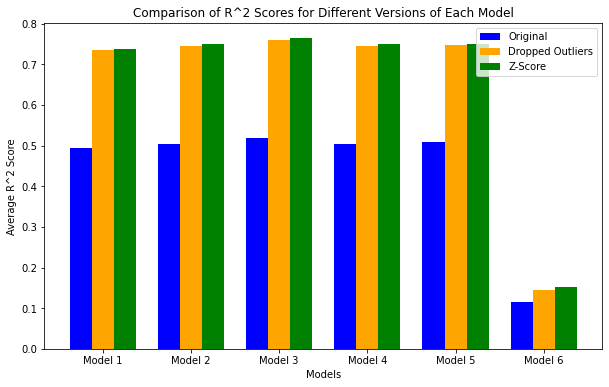

In [35]:
# Width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
bar_positions = np.arange(len(model_names))

# Create bar plot for the different versions of each model
plt.figure(figsize=(10, 6))
plt.bar(bar_positions, r2_scores, color='blue', width=bar_width, label='Original')
plt.bar(bar_positions + bar_width, averages_r2_scores_dropped, color='orange', width=bar_width, label='Dropped Outliers')
plt.bar(bar_positions + 2 * bar_width, average_r2_scores_zscore, color='green', width=bar_width, label='Z-Score')

# Set x-axis labels and tick labels
plt.xticks(bar_positions + bar_width, model_names)
plt.xlabel('Models')
plt.ylabel('Average R^2 Score')
plt.title('Comparison of R^2 Scores for Different Versions of Each Model')
plt.legend()

# Show the plot
plt.show()

### The Winner Is Model 3 (Z-Score) 

In [36]:
print("The Average R^2 Score of Model 3 (Z-Score) is:" , average_r2_3_zscore)

The Average R^2 Score of Model 3 (Z-Score) is: 0.7642208133679602


### Conclusion:

Based on the machine learning section, we trained and evaluated multiple linear regression models with different sets of features. The models were trained using the original dataset, the dataset with dropped outliers, and the dataset with z-score handling for outliers.
Upon comparing the R^2 scores, we observed that the models had relatively similar performance. However, **Model 3 (Z-Score) achieved the highest average R^2 score**, making it the "Winner" among the models, although **by a very small margin.**
Furthermore, the last bar plot clearly depicts the impact of handling outliers on the model's performance. The models trained with the dropped outliers and z-score handling demonstrated improved performance compared to the original models.

Although the outliers were identifiable through visual analysis of the scatter plot, the z-score method provided a more systematic and reliable approach to handle outliers in our dataset. By using z-scores, we were able to optimize the model's performance further.

In conclusion, based on the evaluation of the models and their R^2 scores, Model 3 (Z-Score) emerged as the top-performing model. Additionally, the utilization of outlier handling techniques, such as dropping outliers and using z-scores, proved to be crucial in enhancing the model's accuracy and robustness.

Another meaning that can be derived from the data results is that for flights priced at around $1000 or less, the price is relatively "expected" and primarily influenced by the flight duration (which is, of course, related to the distance).
Additionally, the aircraft type (Boeing or Airbus) does not have a significant impact on the flight price, nor does the frequency of the flight.

In flights priced above $1000, the pricing of the flight is higher than the "expected" price. It is possible that these flights require significantly more resources compared to shorter flights, and this can be attributed to this context.